In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("ttrain.csv")

In [3]:
df2=pd.read_csv("ttest.csv")

### Eda-Exploratory Data Analysis

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df1.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S


In [7]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df1.shape, df2.shape

((891, 12), (418, 11))

In [10]:
df=df1.append(df2)

C:\Users\busel\AppData\Local\Temp\ipykernel_88708\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## boş verileri doldurma

In [14]:
df["Fare"].mean(),df["Fare"].min(),df["Fare"].max(),df["Fare"].std()
# fare ödenen ücret

(33.29547928134557, 0.0, 512.3292, 51.75866823917414)

In [16]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())
#fillna doldur demek boş ücret değerlerini fillna ve mean kullanarak ortalamayla dolduruyoruz

<Axes: xlabel='Embarked', ylabel='count'>

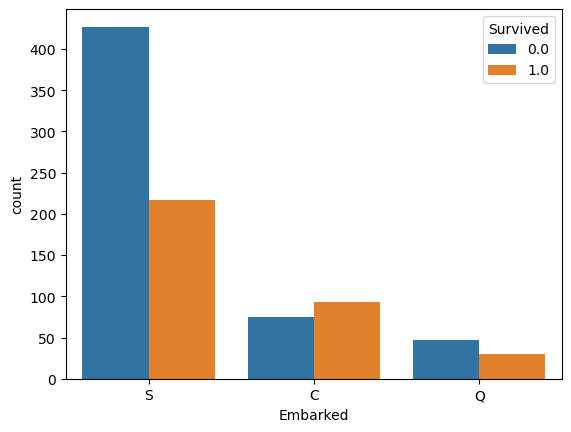

In [20]:
sns.countplot(x=df["Embarked"],hue=df["Survived"])
#limanlardan binişlere göre yaşayanları ve ölülerin grafiğini verir

In [22]:
df["Embarked"].value_counts()
#hangi limandan kaç lişinin bindiği

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [23]:
df["Embarked"].value_counts(normalize=True)
#hangi limandan kaç lişinin bindiğinin yüzdeliği

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [27]:
df["Embarked"]=df["Embarked"].fillna("S")


In [28]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [29]:
df.shape

(1309, 12)

In [31]:
#df.dropna()
#boş gördüğü satırı yok eder

In [33]:
del df["Cabin"]
# df.drop("Cabin", axis=1,inplace=True)
# iki kodda cabin sütununu siler  axis=0 satır axis=1 sütun siler

KeyError: 'Cabin'

In [34]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [35]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
419,420,0.0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,S


### Feature Engineering- Veride olmayıp sonradan üretilen sütunlar

In [36]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.", expand= False)
#name dütunundaki boşluğu bul A dan Z ye kadar büyük harfleri al a dan zye küçük harfleri al ve noktada dur

In [38]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [39]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [42]:
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")
# bütün bekar kadınları misste evli kadınları mrsde ve erkekleri mrde birleştirdik

In [43]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [45]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [47]:
df.groupby("Sex")["Age"].mean()
#kadınları ayrı erkekleri ayrı grupla yaş ortalamasını bul

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [48]:
df.groupby("Title")["Age"].median()

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [49]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [50]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [51]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
490,491,0.0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,30.0,1,0,65304,19.9667,S,Mr


In [54]:
df.drop(["PassengerId","Ticket","Name"],axis=1,inplace=True)
#passanger id ticket ve name sütunlarını siliyoruz

In [55]:
df["Family"]=df["SibSp"]+df["Parch"]+1
#sipsp kardeş sayımız parch ebeyn sayımız +1 ise kendimiz hepsinin toplamı ailemizin üyelerinin toplam sayısı

In [56]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [59]:
data=pd.get_dummies(df,drop_first=True)
#verileri rakama çeviriyoruz drop firstte mesela female ve male diye seçenek var ilk seçenek olan femaleyi tablodan siliyor erkekse 1 kadınsa 0 yazıyor male sütununa 

In [60]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [61]:
train=data[:891]
test=data[891:]
#birleştirdiğimiz ttrain ve ttest verisini tekrar ayırıyoruz

In [63]:
x=train.drop("Survived",axis=1)
y=train["Survived"]

In [64]:
test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,1


In [66]:
data.to_csv("titanicreadydata.csv")
#yeni oluşturduğumuz verileri bir dosya olarak kaydettik

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
d=DecisionTreeClassifier()

In [69]:
model=d.fit(x,y)

In [73]:
tahmin=model.predict(test.drop("Survived",axis=1))
#survived sütununu tahmin edeceğimiz için o sütunu sildik

In [74]:
sonuc=pd.DataFrame()

In [76]:
sonuc["PassengerId"]=df2["PassengerId"]
sonuc["Survived"]=tahmin

In [77]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,1.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [79]:
sonuc["Survived"]=sonuc["Survived"].astype("int32")
#survived 1.0 ve 0.0 değerlerini 1 ve 0 şeklinde görürrüz

In [80]:
sonuc

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
sonuc.to_csv("titanicpredict.csv",index=False)
#son dosyayı kaydediyoruz fakat tablodaki 0,1,..416,417 sayılarının çıkmaması için index false yapıyoruz